In [1]:
import pandas as pd 
import numpy as np 
import nltk
import re
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
df = pd.read_pickle("labeled_data.p")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  object
 5   tweet               24783 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [3]:
q = []
for i in range(0,24783):
    if df.index[i]!=i:
        q.append(i)   
index = []
for j in range(0,24783):
    index.append(j)
df['index']=index
df = df.set_index(df['index'])
df = df.drop(['index'],axis=1)
df = df.drop(['count'],axis=1)
df = df.drop(['hate_speech'],axis=1)
df = df.drop(['offensive_language'],axis=1)
df = df.drop(['neither'],axis=1)

In [4]:
df

,class,tweet
index,,
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...


In [5]:
key=['neither','offensive','hate']
g = []
for h in range(0,3):
    g.append([key[h],df['tweet'][df['class']==h].count()])
category_count=pd.DataFrame(g)

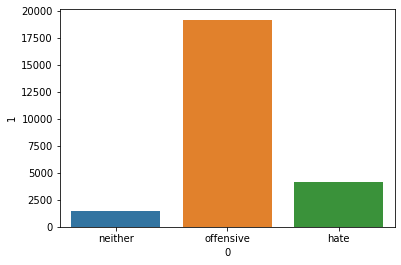

In [6]:
sns.barplot(x=0,y=1,data=category_count)

In [7]:
def remove_excalmation_at_beginning(str):
    exclamation = '!!*'
    e=re.match(exclamation,str)
    if(e):
        return re.split(exclamation,str)[1]
    else:
        return str
def rt_remove(str):
    rt = '^ RT '
    e=re.match(rt,str)
    if(e):
        return re.split(rt,str)[1]
    else:
        return str
def lemmatize(str):
    lemmatizer=WordNetLemmatizer()
    return lemmatizer.lemmatize(str)
def remove_nametag(str):
    name_tag = '@[\w\-(:)]+'
    return re.sub(name_tag,'',str)
def remove_space_at_beginning(str):
    return str.lstrip()
def remove_url(str):
    url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(url,'',str)
def tokenizer(str): 
    return str.split()
def word_lemmatize(str):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(str)
def lower_case(str):
    return str.lower()

In [8]:
for i in range(0,df['tweet'].count()):
    df['tweet'].loc[i] = remove_excalmation_at_beginning(df['tweet'].loc[i])
    df['tweet'].loc[i] = rt_remove(df['tweet'].loc[i])
    df['tweet'].loc[i] = remove_space_at_beginning(df['tweet'].loc[i])
    df['tweet'].loc[i] = df['tweet'].loc[i].lstrip()
    df['tweet'].loc[i] = remove_nametag(df['tweet'].loc[i])
    df['tweet'].loc[i] = remove_url(df['tweet'].loc[i])
    df['tweet'].loc[i] = tokenizer(df['tweet'].loc[i])

In [9]:
for i in range(0,df['tweet'].count()):
    for j in range(0,len(df['tweet'].loc[i])):
        df['tweet'].loc[i][j] = lower_case(df['tweet'].loc[i][j])
        df['tweet'].loc[i][j] = word_lemmatize(df['tweet'].loc[i][j])

In [11]:
stop_words = set(stopwords.words('english'))
for i in range(0,df['tweet'].count()):
    for w in df['tweet'].loc[i]:
        if w in stop_words:
            df['tweet'].loc[i].remove(w)

In [12]:
df

,class,tweet
index,,
0,2,"[woman, shouldn't, complain, cleaning, your, h..."
1,1,"[boy, dat, cold...tyga, dwn, bad, cuffin, dat,..."
2,1,[dawg]
3,1,"[look, like, tranny]"
4,1,"[shit, hear, me, might, true, might, faker, th..."
...,...,...
24778,1,"[you's, muthaf***in, lie, &#8220;, right!, tl,..."
24779,2,"[gone, broke, wrong, heart, baby,, drove, redn..."
24780,1,"[young, buck, wanna, eat!!.., dat, nigguh, lik..."
